## Logistic regression 
🔸 Logistic regression is an algorithm that can help us answering yes or no questions by predicting the probability something happening or not happening.

🔸 Logistic regression is a classification algorithm despite its name has regression in it. It predicts two binary dependent output either as 0 or 1 based on the input variables.

🔸The regression in its name means we are using the same algorithm as used in linear
regression. The difference is that the output is mapped using a logistic/sigmoid
function so that it will be in a range between 0 and 1. Any output value < 0.5 will be
classified as 0 and any value >= 0.5 will be classified as 1.

🔸 In this notebook, the [sklearn logistic regression algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) is implemented on a simulated seperable dataset with two features

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

### Simulating data

The data used in this notebook are simulated using np.random.multivariate_normal to create two seperable features.
Credit to [git repo](https://github.com/vu2swz/Logistic-Regression-from-Scratch-in-Python/blob/master/data.py)

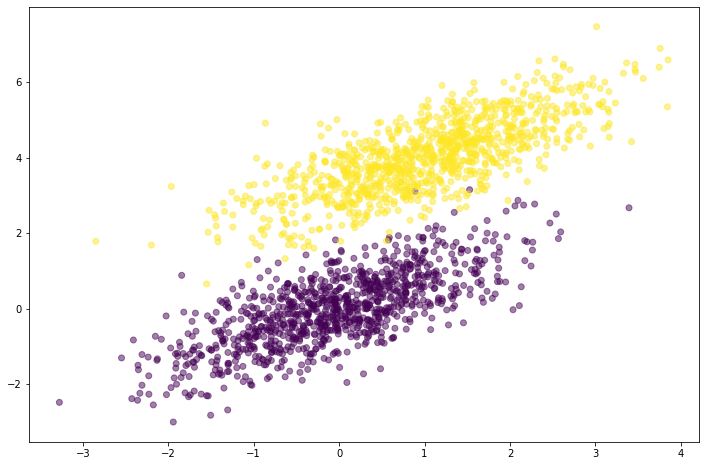

In [2]:
np.random.seed(42)
num_observations = 1000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

#Displaying the output

fig = plt.figure(figsize=(12,8))
plt.scatter(features[:, 0], features[:, 1], c = labels, alpha = .5)
plt.show()

### Split data to train and test dataset

In [3]:
df = pd.DataFrame()

In [4]:
df['feature_1'] = features[:,0]
df['feature_2'] = features[:,1]
df['label'] = labels.astype(int)

In [5]:
df.head()

,feature_1,feature_2,label
0,-0.415750,-0.513517,0
1,-1.144330,-0.067385,0
2,0.301810,0.136251,0
3,-1.748547,-1.205889,0
4,0.247329,0.630977,0


In [6]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
train_frac = 0.7
train_size = int(df.shape[0] * train_frac)
x = np.array(df.iloc[:,0:2])
y = np.array(df.iloc[:,2])
x_train = x[0:train_size,:]
y_train = y[0:train_size]
x_test = x[train_size:,:]
y_test = y[train_size:]

In [8]:
print ('training size is {}\ntest size is {}'.format(x_train.shape[0], x_test.shape[0]))

training size is 1400
test size is 600


### Initialize the model

In [9]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
coef = clf.coef_
intercept = clf.intercept_
train_accuracy = clf.score(x_train, y_train)
print ('training accuracy {}'.format(train_accuracy))

training accuracy 0.9935714285714285


### Predict using gradient descent method

In [10]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
test_accuracy = clf.score(x_test, y_test)

In [11]:
# print the test data, predicted test data and the error
print('y_test\n {}\n\ny_pred_test\n {}\n\ntest accuracy {}\n\ncoef {} intercept {}'
      .format(y_test[0:20], y_pred_test[0:20], test_accuracy, coef, intercept))

y_test
 [0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1]

y_pred_test
 [0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1]

test accuracy 0.995

coef [[-2.22854218  4.55550901]] intercept [-8.20091535]


### Visulize fitted results using both method

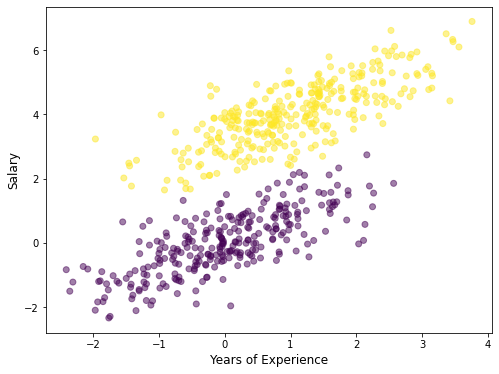

In [12]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_test, alpha=0.5)
plt.title('', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

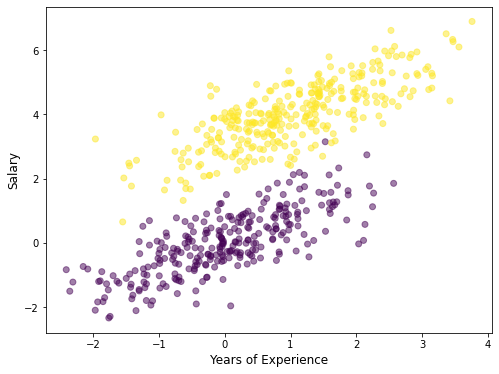

In [13]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha=0.5)
plt.title('', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()